In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# UPX Deep Learning



## 1. Importing and inital analysis 

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix 
from math import sqrt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_colwidth', -1)

import warnings
warnings.simplefilter('ignore')

In [4]:
df = pd.read_csv('/content/gdrive/My Drive/UPX Certificate - 2/phishing_data.csv')
df.head()

url  ...      status
0  http://www.progarchives.com/album.asp?id=61737                                                                                    ...  phishing  
1  http://signin.eday.co.uk.ws.edayisapi.dllsign.inusingsslpuseridcopartnerid2siteid.zdfxx949xyss1pnbh0soabfdzgdh2kppnu.reippl.com/  ...  phishing  
2  http://www.avevaconstruction.com/blesstool/image.htm                                                                              ...  phishing  
3  http://www.jp519.com/                                                                                                             ...  legitimate
4  https://www.velocidrone.com/                                                                                                      ...  legitimate

[5 rows x 89 columns]

In [ ]:
df.info()

In [6]:
df.describe().transpose()

count           mean  ...       75%         max
length_url       11481.0  61.203902      ...  71.0      1641.0    
length_hostname  11481.0  21.129344      ...  24.0      214.0     
nb_dots          11481.0  2.496298       ...  3.0       24.0      
nb_at            11481.0  0.022124       ...  0.0       4.0       
nb_qm            11481.0  0.140928       ...  0.0       3.0       
...                  ...       ...       ...  ...       ...       
domain_age       11481.0  4059.613884    ...  7006.0    12873.0   
web_traffic      11481.0  863086.163313  ...  373319.0  10767986.0
dns_record       11481.0  0.019598       ...  0.0       1.0       
google_index     11481.0  0.535493       ...  1.0       1.0       
page_rank        11481.0  3.190837       ...  5.0       10.0      

[84 rows x 8 columns]

## EDA

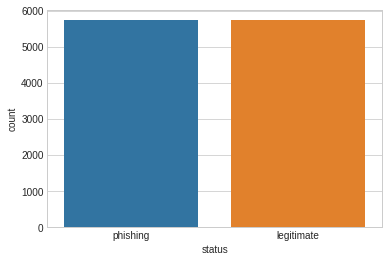

In [8]:
sns.countplot(x='status',data=df)

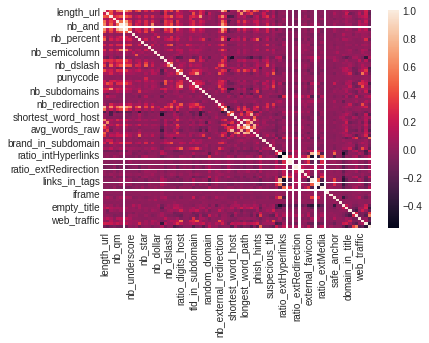

In [9]:
sns.heatmap(df.corr())

In [26]:
df = df.fillna(df.mean())
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()

df = df.apply(LabelEncoder().fit_transform)
df.isnull().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

## Train Test Split

In [29]:
X = df.drop(['status', 'url'], axis=1).values
y = df['status'].values

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [33]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

In [35]:
X_train.shape

(8610, 87)

In [36]:
model = Sequential()


model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [37]:

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

Epoch 1/600
270/270 [==============================] - 0s 2ms/step - loss: 0.3366 - val_loss: 0.1922
Epoch 2/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1792 - val_loss: 0.1710
Epoch 3/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1599 - val_loss: 0.1569
Epoch 4/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1495 - val_loss: 0.1438
Epoch 5/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1400 - val_loss: 0.1353
Epoch 6/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1323 - val_loss: 0.1314
Epoch 7/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1247 - val_loss: 0.1289
Epoch 8/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1190 - val_loss: 0.1283
Epoch 9/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1139 - val_loss: 0.1233
Epoch 10/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1063 - val_lo

In [ ]:
# model.history.history

In [38]:
model_loss = pd.DataFrame(model.history.history)

In [ ]:
# model_loss

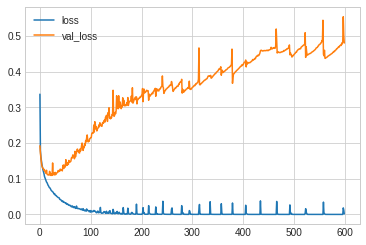

In [39]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [40]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [42]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [43]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
270/270 [==============================] - 0s 2ms/step - loss: 0.3445 - val_loss: 0.1910
Epoch 2/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1826 - val_loss: 0.1621
Epoch 3/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1612 - val_loss: 0.1485
Epoch 4/600
270/270 [==============================] - 0s 2ms/step - loss: 0.1498 - val_loss: 0.1413
Epoch 5/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1413 - val_loss: 0.1344
Epoch 6/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1318 - val_loss: 0.1278
Epoch 7/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1238 - val_loss: 0.1231
Epoch 8/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1173 - val_loss: 0.1211
Epoch 9/600
270/270 [==============================] - 0s 2ms/step - loss: 0.1118 - val_loss: 0.1171
Epoch 10/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1054 - val_lo

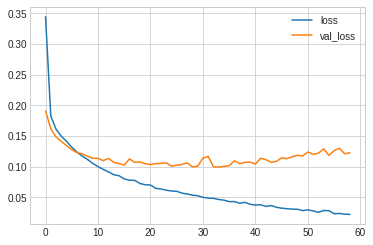

In [44]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [45]:
from tensorflow.keras.layers import Dropout

In [46]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [47]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
270/270 [==============================] - 1s 2ms/step - loss: 0.5031 - val_loss: 0.2488
Epoch 2/600
270/270 [==============================] - 0s 1ms/step - loss: 0.3055 - val_loss: 0.1929
Epoch 3/600
270/270 [==============================] - 0s 1ms/step - loss: 0.2536 - val_loss: 0.1739
Epoch 4/600
270/270 [==============================] - 0s 1ms/step - loss: 0.2319 - val_loss: 0.1663
Epoch 5/600
270/270 [==============================] - 0s 1ms/step - loss: 0.2152 - val_loss: 0.1592
Epoch 6/600
270/270 [==============================] - 0s 2ms/step - loss: 0.2079 - val_loss: 0.1530
Epoch 7/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1976 - val_loss: 0.1467
Epoch 8/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1895 - val_loss: 0.1414
Epoch 9/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1804 - val_loss: 0.1397
Epoch 10/600
270/270 [==============================] - 0s 1ms/step - loss: 0.1780 - val_lo

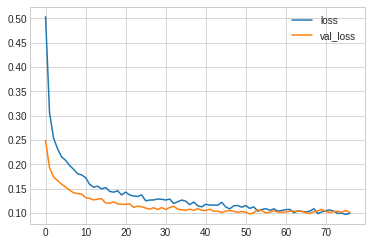

In [48]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [49]:
predictions = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [50]:
from sklearn.metrics import classification_report,confusion_matrix

In [51]:

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1442
           1       0.96      0.97      0.97      1429

    accuracy                           0.97      2871
   macro avg       0.97      0.97      0.97      2871
weighted avg       0.97      0.97      0.97      2871



In [57]:
conf = confusion_matrix(y_test,predictions)
print(conf)

[[1388   54]
 [  39 1390]]


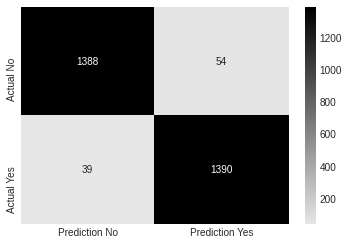

In [58]:
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.heatmap(conf, cmap = cmap,xticklabels=['Prediction No','Prediction Yes'],yticklabels=['Actual No','Actual Yes'], annot=True,
            fmt='d')